<a href="https://colab.research.google.com/github/owlbemi/CS4372Assignment3/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## References


*   https://keras.io/
*   https://www.kaggle.com/competitions/dog-breed-identification
*   https://www.youtube.com/watch?v=_iEPDHARJJw&ab_channel=AbdulRehman2050


## Prepare Data

In [ ]:
!pip install keras_applications

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.6.0.163-1+cuda11.7
!pip uninstall -y tensorflow estimator keras
!pip install -U tensorflow_text tensorflow tensorflow_datasets
!pip install einops

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package libcudnn8 is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Version '8.6.0.163-1+cuda11.7' for 'libcudnn8' was not found
Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Successfully uninstalled keras-3.4.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.7 MB/s eta 0:00:00


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!mkdir ./drive/MyDrive/CS4372Assignment3
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘./drive/MyDrive/CS4372Assignment3’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dog-breed-identification

 98% 679M/691M [00:09<00:00, 93.4MB/s]
100% 691M/691M [00:09<00:00, 73.9MB/s]


In [ ]:
!unzip /content/dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

## Traing & Test Data

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_text as text
from PIL import Image
import pandas as pd

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, activations, losses

from keras.src import backend
from keras.src import layers
from keras.src.api_export import keras_export
from keras.src.applications import imagenet_utils
from keras.src.models import Functional
from keras.src.ops import operation_utils
from keras.src.utils import file_utils

In [ ]:
train_path = '/content/train/'
test_path = '/content/test/'

labels_df = pd.read_csv('/content/labels.csv')

filenames = [train_path + fname + '.jpg' for fname in labels_df['id']]
filenames[:10]

['/content/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
filenames = [train_path + fname + '.jpg' for fname in labels_df['id']]
filenames[:10]

['/content/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
class_names = labels_df['breed'].unique()
class_names[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog'], dtype=object)

In [ ]:
target_labels = [breed for breed in labels_df['breed']]
target_labels[:10]
target_labels[0] == class_names
target_labels_encoded = [label == np.array(class_names) for label in target_labels]
target_labels_encoded[:2]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False,  True, False, False, False, Fal

In [ ]:
from sklearn.model_selection import train_test_split

NUM_IMAGES = 2000

X_train, X_val, Y_train, Y_val = train_test_split(filenames[:NUM_IMAGES], target_labels_encoded[:NUM_IMAGES], test_size=0.2, random_state=42)

## Image Processing

In [ ]:
from matplotlib.pyplot import imread

img = imread(X_train[0])

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(359, 500, 3), dtype=uint8, numpy=
array([[[ 88,  96,  99],
        [ 84,  92,  95],
        [ 92, 100, 103],
        ...,
        [ 21,  32,  38],
        [ 20,  31,  37],
        [ 19,  30,  36]],

       [[ 94, 102, 105],
        [ 89,  97, 100],
        [ 96, 104, 107],
        ...,
        [ 19,  30,  36],
        [ 18,  29,  35],
        [ 17,  28,  34]],

       [[ 93, 101, 104],
        [ 88,  96,  99],
        [ 96, 104, 107],
        ...,
        [ 16,  27,  33],
        [ 15,  26,  32],
        [ 14,  25,  31]],

       ...,

       [[  6,  30,  74],
        [  7,  32,  73],
        [  9,  34,  74],
        ...,
        [ 33,  40,  50],
        [ 34,  41,  51],
        [ 35,  42,  52]],

       [[  9,  33,  77],
        [  9,  34,  75],
        [ 10,  35,  75],
        ...,
        [ 35,  42,  52],
        [ 36,  43,  53],
        [ 37,  44,  54]],

       [[  7,  31,  75],
        [  7,  32,  73],
        [  7,  32,  72],
        ...,
        [ 36,  43,  5

In [ ]:
tf.image.convert_image_dtype(img, tf.float32)

<tf.Tensor: shape=(359, 500, 3), dtype=float32, numpy=
array([[[0.34509805, 0.37647063, 0.38823533],
        [0.32941177, 0.36078432, 0.37254903],
        [0.36078432, 0.3921569 , 0.4039216 ],
        ...,
        [0.08235294, 0.1254902 , 0.14901961],
        [0.07843138, 0.12156864, 0.14509805],
        [0.07450981, 0.11764707, 0.14117648]],

       [[0.36862746, 0.40000004, 0.41176474],
        [0.34901962, 0.3803922 , 0.3921569 ],
        [0.37647063, 0.40784317, 0.41960788],
        ...,
        [0.07450981, 0.11764707, 0.14117648],
        [0.07058824, 0.1137255 , 0.13725491],
        [0.06666667, 0.10980393, 0.13333334]],

       [[0.3647059 , 0.39607847, 0.40784317],
        [0.34509805, 0.37647063, 0.38823533],
        [0.37647063, 0.40784317, 0.41960788],
        ...,
        [0.0627451 , 0.10588236, 0.12941177],
        [0.05882353, 0.10196079, 0.1254902 ],
        [0.05490196, 0.09803922, 0.12156864]],

       ...,

       [[0.02352941, 0.11764707, 0.2901961 ],
        [0.02

## Data Batch

In [ ]:
BATCH_SIZE = 32

In [ ]:
def process_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_image(img, channels =3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize_with_crop_or_pad(img, 224, 224)
    return img

def get_image_label(image_path, label):
    image = process_image(image_path)
    return image, label

get_image_label(X_train[10], Y_train[10])

def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data= False, test_data=False):
    if test_data:
        print("Creating Test data")
        test_data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        test_data = test_data.map(process_image).batch(BATCH_SIZE)
        return test_data

    if valid_data:
        print("Creating Validation data")
        valid_data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        valid_data = valid_data.map(get_image_label).batch(BATCH_SIZE)
        return valid_data

    else:
        print("Creating Training Data")
        train_data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))).shuffle(buffer_size = len(X))
        train_data = train_data.map(get_image_label).batch(BATCH_SIZE)
        return train_data

In [ ]:
train_data = create_data_batches(X_train, Y_train)
valid_data = create_data_batches(X_val, Y_val, valid_data= True)

Creating Training Data
Creating Validation data


In [ ]:
sample =next(iter(train_data))
sample[0][0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.27450982, 0.3254902 , 0.34901962],
        [0.24313727, 0.28627452, 0.29411766],
        [0.19215688, 0.227451  , 0.22352943],
        ...,
        [0.16470589, 0.26666668, 0.27058825],
        [0.16078432, 0.27058825, 0.27450982],
        [0.16078432, 0.27058825, 0.27450982]],

       [[0.2627451 , 0.30588236, 0.32156864],
        [0.21568629, 0.25490198, 0.25882354],
        [0.16470589, 0.18823531, 0.18039216],
        ...,
        [0.16470589, 0.26666668, 0.27058825],
        [0.16862746, 0.27058825, 0.27450982],
        [0.16078432, 0.27058825, 0.27450982]],

       [[0.27058825, 0.3137255 , 0.32156864],
        [0.20000002, 0.2392157 , 0.23529413],
        [0.14509805, 0.16862746, 0.15294118],
        ...,
        [0.16862746, 0.27058825, 0.27450982],
        [0.16862746, 0.27058825, 0.27450982],
        [0.16862746, 0.27058825, 0.27450982]],

       ...,

       [[0.227451  , 0.21960786, 0.16862746],
        [0.24

### Default parameter for MNV2

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
def create_model():
    base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,
                                                     classes = len(class_names))
    base_model.trainable = False

    inputs = layers.Input(shape = (224,224,3))
    x = base_model(inputs, training = False)
    x = tf.keras.layers.GlobalAveragePooling2D(name= "global_average_pooling")(x)
    x = layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

    ModelDogBreed = tf.keras.Model(inputs, outputs)

    ModelDogBreed.compile(loss = "categorical_crossentropy",
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])

    return ModelDogBreed

In [ ]:
model = create_model()

EarlyStoppingCallbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, baseline=None, restore_best_weights=True
)

<ipython-input-23-87af2c1e3004>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
ModelDogBreed_History = model.fit(train_data,
                                         steps_per_epoch = len(X_train)//BATCH_SIZE,
                                         epochs = 10,
                                         validation_data = valid_data,
                                         validation_steps = len(X_val)//BATCH_SIZE,
                                         callbacks = [EarlyStoppingCallbacks])

Epoch 1/10
21/50 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.0106 - loss: 5.2663

In [ ]:
model.evaluate(valid_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5630 - loss: 1.7643


[1.65702223777771, 0.5774999856948853]

In [ ]:
#model.save('/content/drive/MyDrive/CS4372Assignment3/mobile_net_model.h5')

## Predictions & Display

In [ ]:
predictions = model.predict(valid_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


In [ ]:
def get_pred_label(prediction_probabilities):
  return class_names[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[0])

In [ ]:
def unbatch(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(class_names[np.argmax(label)])
  return images, labels

val_images, val_labels = unbatch(valid_data)

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label))

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = class_names[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

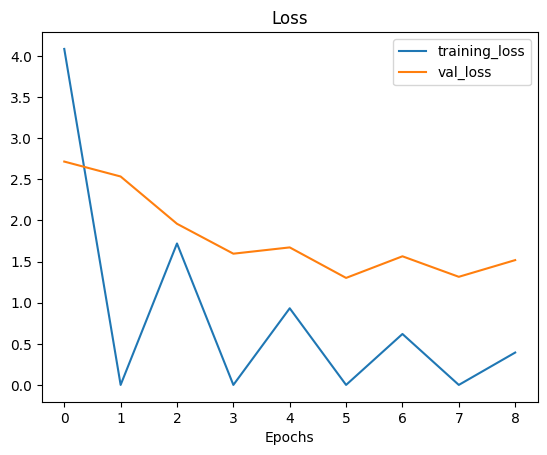

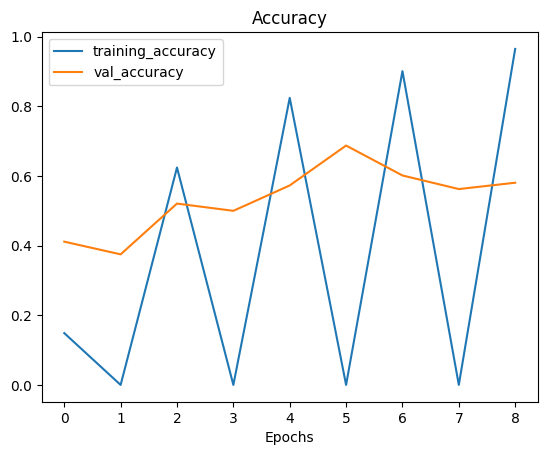

In [ ]:
plot_loss_curves(ModelDogBreed_History)

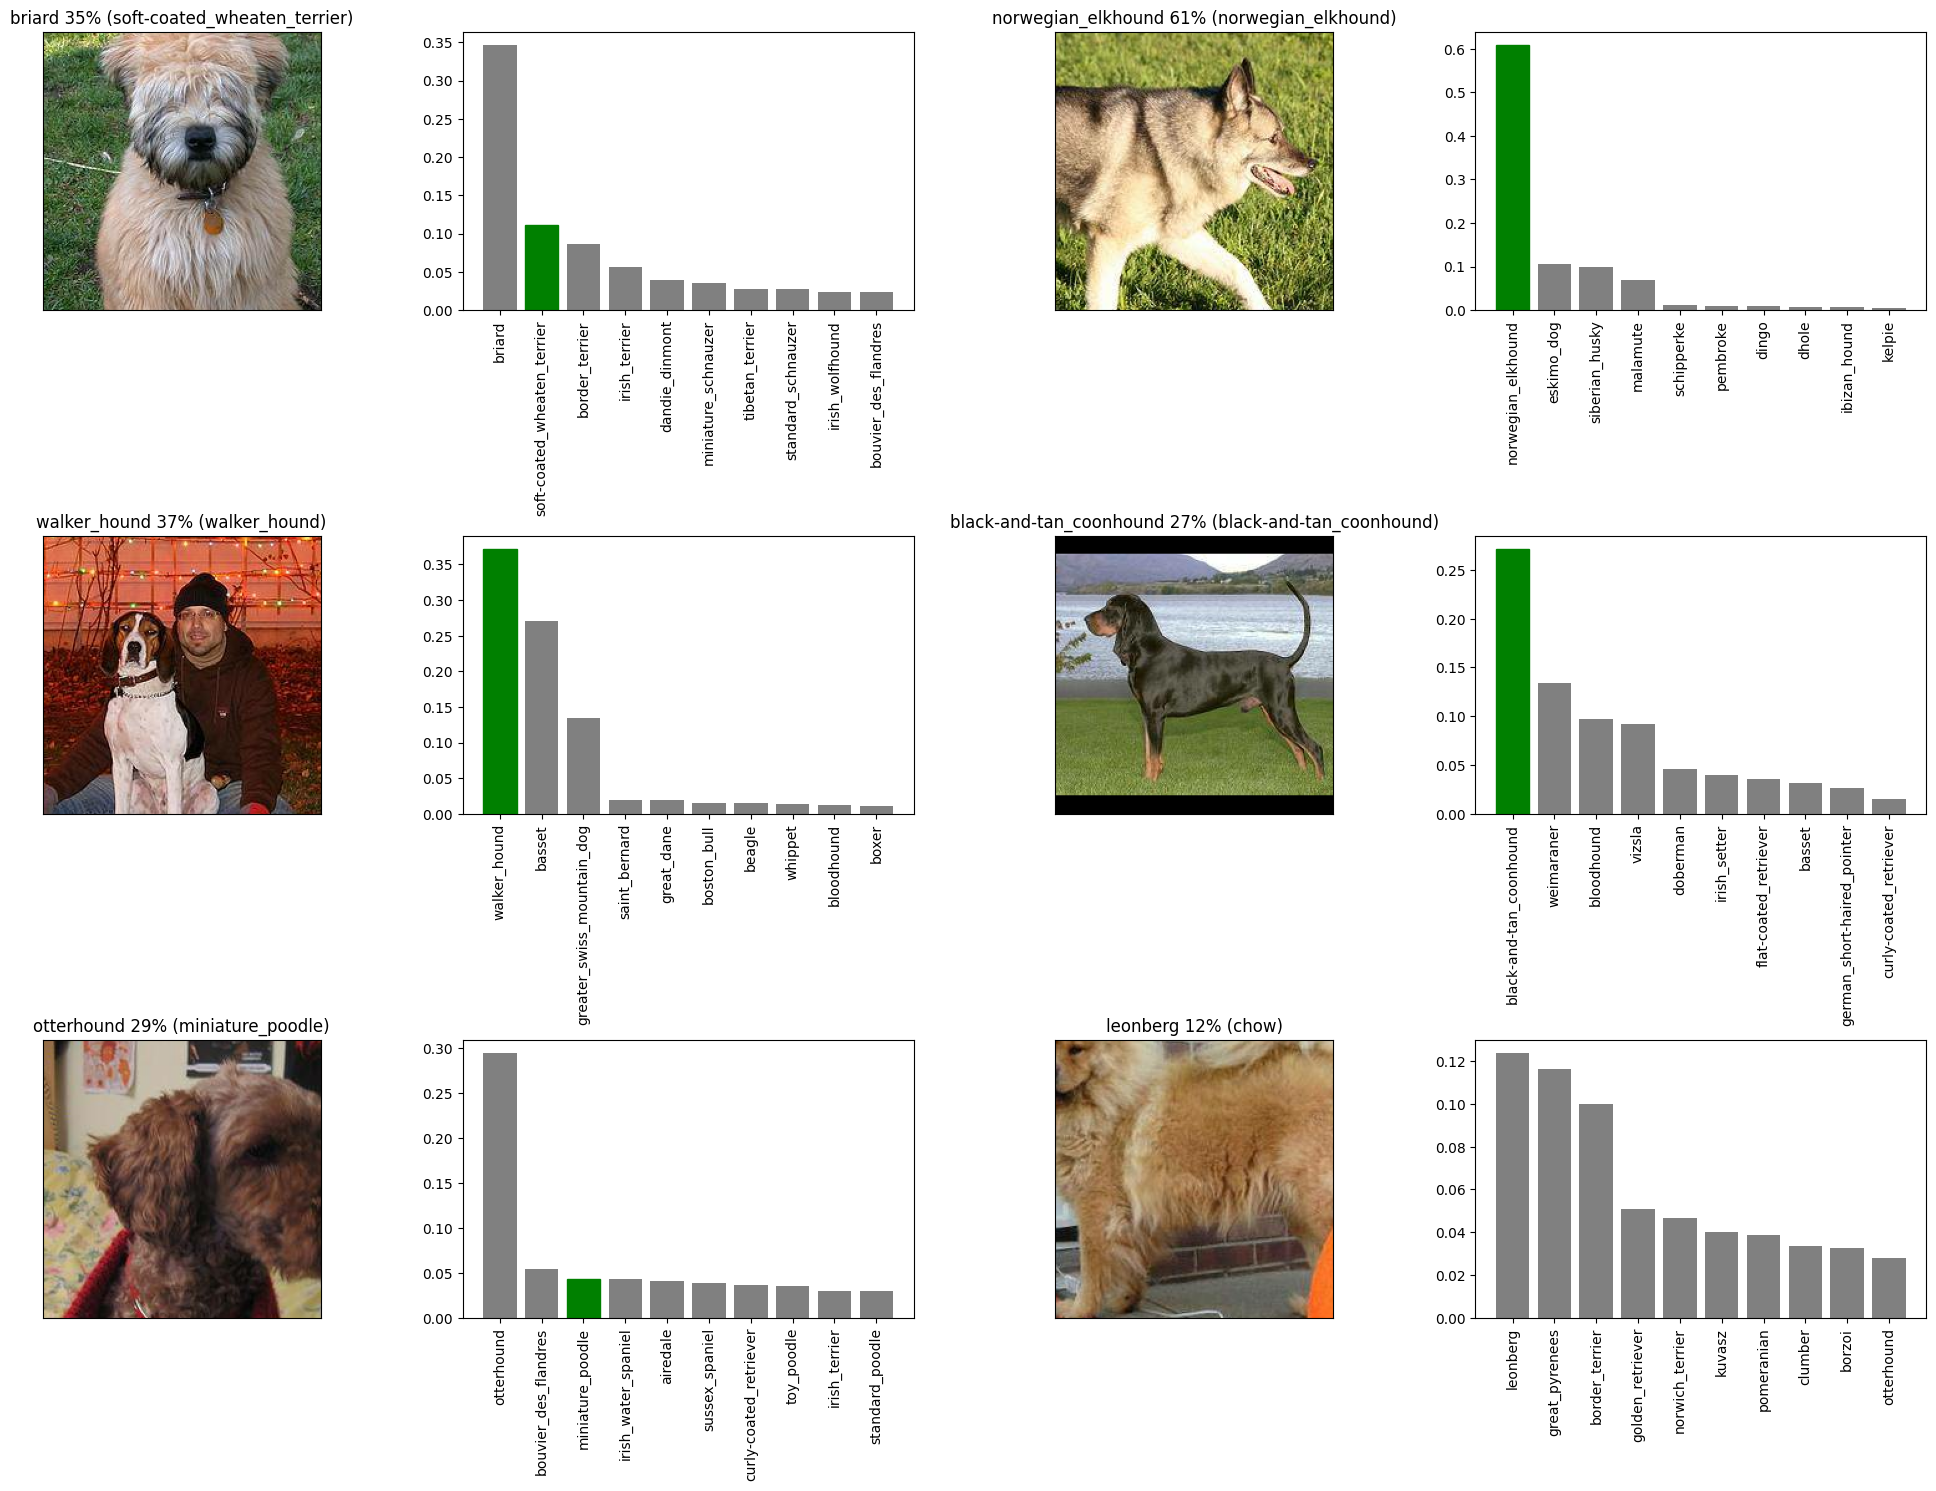

In [ ]:
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
accuracy = ModelDogBreed_History.history['accuracy']
val_accuracy = ModelDogBreed_History.history['val_accuracy']

print(f'Accuracy: {accuracy[-1]:.4f}')
print(f'Validation Accuracy: {val_accuracy[-1]:.4f}')

Accuracy: 0.9650
Validation Accuracy: 0.5807


## Training

In [ ]:
full_data = create_data_batches(filenames, target_labels_encoded)

Creating Training Data


In [ ]:
ModelDogBreed_FullData = create_model()

<ipython-input-24-87af2c1e3004>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,


### 10 **Epochs**

In [ ]:
FullModelDogBreed_FullData_History = ModelDogBreed_FullData.fit(full_data,
                                         steps_per_epoch = len(full_data),
                                         validation_data = valid_data,
                                         validation_steps = len(X_val)//BATCH_SIZE,
                                         epochs = 10,
                                         callbacks = [EarlyStoppingCallbacks])

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 572s 2s/step - accuracy: 0.3325 - loss: 3.0348 - val_accuracy: 0.7604 - val_loss: 0.9352
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.8207
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 588s 2s/step - accuracy: 0.7273 - loss: 0.9582 - val_accuracy: 0.8594 - val_loss: 0.6080
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.6127
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.8088 - loss: 0.6755 - val_accuracy: 0.8828 - val_loss: 0.4806
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4524
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 556s 2s/step - accuracy: 0.8583 - loss: 0.5141 - val_accuracy: 0.9245 - val_loss: 0.3326
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00

In [ ]:
test_path = "/content/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

In [ ]:
test_data = create_data_batches(X=test_filenames, test_data=True)

Creating Test data


In [ ]:
test_predictions = ModelDogBreed_FullData.predict(test_data,
                                      verbose=1)

  9/324 ━━━━━━━━━━━━━━━━━━━━ 15:55 3s/step

KeyboardInterrupt: 

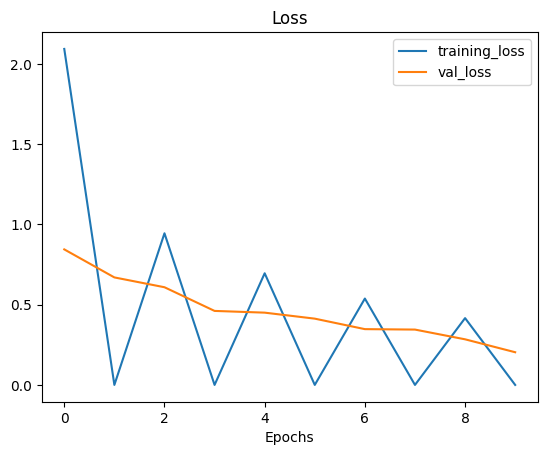

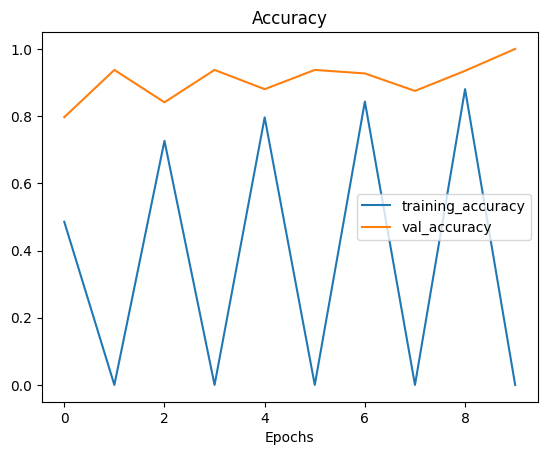

In [ ]:
plot_loss_curves(FullModelDogBreed_FullData_History)

<ipython-input-44-288b1057819a>:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(h_pad=1.0)


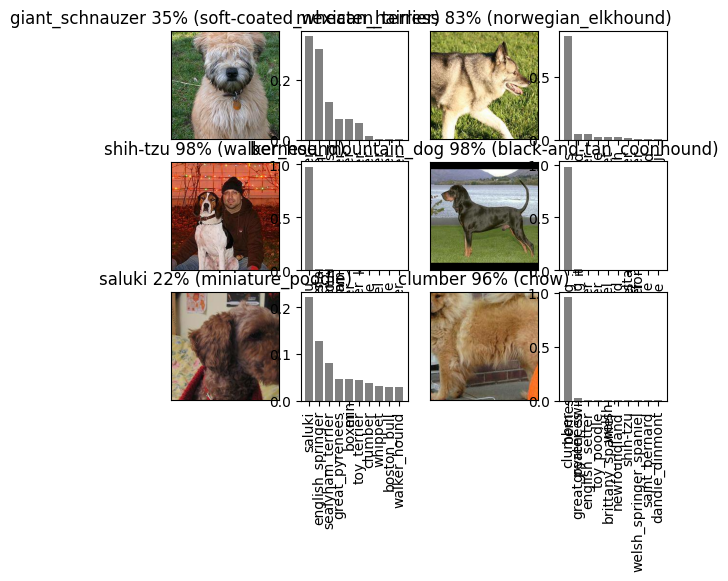

In [ ]:
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_pred(prediction_probabilities=test_predictions,
              labels=val_labels,
              images=val_images,
              n=i + i_multiplier)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_pred_conf(prediction_probabilities=test_predictions,
                   labels=val_labels,
                   n=i + i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
accuracy = FullModelDogBreed_FullData_History.history['accuracy']
val_accuracy = FullModelDogBreed_FullData_History.history['val_accuracy']

print(f'Accuracy: {accuracy[-1]:.4f}')
print(f'Validation Accuracy: {val_accuracy[-1]:.4f}')

Accuracy: 0.0000
Validation Accuracy: 1.0000


### 20 **epochs**

In [ ]:
ModelDogBreed_FullData = create_model()

<ipython-input-23-87af2c1e3004>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,


In [ ]:
FullModelDogBreed_FullData_History = ModelDogBreed_FullData.fit(full_data,
                                         steps_per_epoch = len(full_data),
                                         validation_data = valid_data,
                                         validation_steps = len(X_val)//BATCH_SIZE,
                                         epochs = 20,
                                         callbacks = [EarlyStoppingCallbacks])

Epoch 1/20
 28/320 ━━━━━━━━━━━━━━━━━━━━ 11:05 2s/step - accuracy: 0.0405 - loss: 5.1061

In [ ]:
test_predictions = ModelDogBreed_FullData.predict(test_data,
                                      verbose=1)

In [ ]:
plot_loss_curves(FullModelDogBreed_FullData_History)

In [ ]:
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_pred(prediction_probabilities=test_predictions,
              labels=val_labels,
              images=val_images,
              n=i + i_multiplier)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_pred_conf(prediction_probabilities=test_predictions,
                   labels=val_labels,
                   n=i + i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
accuracy = FullModelDogBreed_FullData_History.history['accuracy']
val_accuracy = FullModelDogBreed_FullData_History.history['val_accuracy']

print(f'Accuracy: {accuracy[-1]:.4f}')
print(f'Validation Accuracy: {val_accuracy[-1]:.4f}')

## Different Parameters

- Base Model Trainable: False
- Dropout Rate = 0.3
- Optimizer = Adam (LR = 0.0001)

In [ ]:
def create_model():
    base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False,
                                                                input_shape=(224,224,3),
                                                                classes=len(class_names))
    base_model.trainable = False

    inputs = tf.keras.layers.Input(shape=(224,224,3))
    x = base_model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

    # Tune Dropout rate
    x = tf.keras.layers.Dropout(0.3)(x)

    outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

    ModelDogBreed = tf.keras.Model(inputs, outputs)

    # Try different optimizers and learning rates
    ModelDogBreed.compile(loss="categorical_crossentropy",
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                          metrics=["accuracy"])

    return ModelDogBreed

In [ ]:
ModelDogBreed_FullData = create_model()

In [ ]:
FullModelDogBreed_FullData_History = ModelDogBreed_FullData.fit(full_data,
                                         steps_per_epoch = len(full_data),
                                         validation_data = valid_data,
                                         validation_steps = len(X_val)//BATCH_SIZE,
                                         epochs = 20,
                                         callbacks = [EarlyStoppingCallbacks])

In [ ]:
test_predictions = ModelDogBreed_FullData.predict(test_data,
                                      verbose=1)

In [ ]:
plot_loss_curves(FullModelDogBreed_FullData_History)

In [ ]:
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_pred(prediction_probabilities=test_predictions,
              labels=val_labels,
              images=val_images,
              n=i + i_multiplier)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_pred_conf(prediction_probabilities=test_predictions,
                   labels=val_labels,
                   n=i + i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
accuracy = FullModelDogBreed_FullData_History.history['accuracy']
val_accuracy = FullModelDogBreed_FullData_History.history['val_accuracy']

print(f'Accuracy: {accuracy[-1]:.4f}')
print(f'Validation Accuracy: {val_accuracy[-1]:.4f}')

- Base Model Trainable: False
- Dropout Rate = 0.2
- Optimizer = SGD (LR = 0.01)

In [ ]:
def create_model():
    base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False,
                                                                input_shape=(224,224,3),
                                                                classes=len(class_names))
    base_model.trainable = False

    inputs = tf.keras.layers.Input(shape=(224,224,3))
    x = base_model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

    # Tune Dropout rate
    x = tf.keras.layers.Dropout(0.2)(x)

    outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

    ModelDogBreed = tf.keras.Model(inputs, outputs)

    # Try different optimizers and learning rates
    ModelDogBreed.compile(loss="categorical_crossentropy",
                          optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                          metrics=["accuracy"])

    return ModelDogBreed

In [ ]:
ModelDogBreed_FullData = create_model()

In [ ]:
FullModelDogBreed_FullData_History = ModelDogBreed_FullData.fit(full_data,
                                         steps_per_epoch = len(full_data),
                                         validation_data = valid_data,
                                         validation_steps = len(X_val)//BATCH_SIZE,
                                         epochs = 20,
                                         callbacks = [EarlyStoppingCallbacks])

Epoch 1/20
155/320 ━━━━━━━━━━━━━━━━━━━━ 4:55 2s/step - accuracy: 0.0263 - loss: 4.9156

In [ ]:
test_predictions = ModelDogBreed_FullData.predict(test_data,
                                      verbose=1)

In [ ]:
plot_loss_curves(FullModelDogBreed_FullData_History)

In [ ]:
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_pred(prediction_probabilities=test_predictions,
              labels=val_labels,
              images=val_images,
              n=i + i_multiplier)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_pred_conf(prediction_probabilities=test_predictions,
                   labels=val_labels,
                   n=i + i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
accuracy = ModelDogBreed_History.history['accuracy']
val_accuracy = ModelDogBreed_History.history['val_accuracy']

print(f'Accuracy: {accuracy[-1]:.4f}')
print(f'Validation Accuracy: {val_accuracy[-1]:.4f}')